In [3]:
import download as d
import database as db
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [96]:
inner = db.category_query( ('machine learning', 'business software') )
inner

"SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category IN ('machine learning', 'business software') ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

In [3]:


query = """SELECT category, COUNT( DISTINCT subcategory) AS n_categories, COUNT( DISTINCT p.title) AS n_articles
           FROM ({}) as crap 
           JOIN pages p 
           ON crap.pageid = p.pageid
           GROUP BY category;""".format(inner)
query = re.sub("\s+", " ", query)
query

"SELECT category, COUNT( DISTINCT subcategory) AS n_categories, COUNT( DISTINCT p.title) AS n_articles FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category IN ('machine learning', 'business software') ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap JOIN pages p ON crap.pageid = p.pageid GROUP BY category;"

In [4]:
db.query_to_dataframe(query)[['category','n_categories','n_articles']]

,category,n_categories,n_articles
0,business software,129,3274
1,machine learning,48,1091


In [98]:
## Query for total number of articles in each subcategory


query = """SELECT subcategory, COUNT( DISTINCT p.title) as n_articles
           FROM ({}) as crap
           JOIN pages p
           ON crap.pageid = p.pageid
           WHERE category = 'machine learning'
           GROUP BY subcategory;""".format( inner)
query = re.sub("\s+", " ", query)

db.query_to_dataframe( query)


,n_articles,subcategory
0,34,Applied machine learning
1,4,Artificial immune systems
2,14,Artificial intelligence conferences
3,128,Artificial neural networks
4,12,Bayesian networks
5,24,Causal inference
6,81,Classification algorithms
7,18,Cluster analysis
8,38,Cluster analysis algorithms
9,16,Clustering criteria


In [5]:
## QUery for total number of articles

query = """SELECT COUNT( DISTINCT p.title) AS n_articles
           FROM ({}) as crap 
           JOIN pages p 
           ON crap.pageid = p.pageid;""".format(inner)
query = re.sub("\s+", " ", query)
query

"SELECT COUNT( DISTINCT p.title) AS n_articles FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category IN ('machine learning', 'business software') ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap JOIN pages p ON crap.pageid = p.pageid;"

In [6]:
db.query_to_dataframe(query)[['n_articles']]

,n_articles
0,4359


In [ ]:
### 3274 + 1091

In [21]:
allquery = """SELECT p.title, p.article
              FROM ({}) as crap
              JOIN pages p
              ON crap.pageid = p.pageid;""".format( inner)
allquery

"SELECT DISTINCT category, subcategory, p.title, p.article\n              FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category IN ('machine learning', 'business software') ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap\n              JOIN pages p\n              ON crap.pageid = p.pageid;"

In [22]:
cat_pages_df = db.query_to_dataframe( allquery)
cat_pages_df.head()

,article,category,subcategory,title
0,abstract management is the process of acceptin...,business software,Abstract management software,abstract management
1,easychair is a free web based conference manag...,business software,Abstract management software,easychair
2,ex ordo is an abstract and paper management sy...,business software,Abstract management software,exordo
3,openconf is an abstract management and peer re...,business software,Abstract management software,openconf
4,,business software,Abstract management software,open conference systems


In [24]:
## Use mask to subset cat_pages_df to only non-empty articles
category_pages_df = cat_pages_df[~empty_mask][['category','subcategory','title','article']].copy()

category_pages_df.head()

,category,subcategory,title,article
0,business software,Abstract management software,abstract management,abstract management is the process of acceptin...
1,business software,Abstract management software,easychair,easychair is a free web based conference manag...
2,business software,Abstract management software,exordo,ex ordo is an abstract and paper management sy...
3,business software,Abstract management software,openconf,openconf is an abstract management and peer re...
5,business software,Account aggregation providers,account aggregation,account aggregation is a method that involves ...


In [34]:
duplicates_query = """SELECT title, pageid, COUNT( pageid)
                        FROM pages
                        GROUP BY title, pageid
                        HAVING COUNT( pageid) > 1;
                        """

In [35]:
db.query_to_dataframe( duplicates_query)[['title', 'pageid','count']]

,title,pageid,count
0,appleworks,294416,2
1,sap se,276773,2
2,decision tree learning,577003,2
3,teaspiller,30752618,2
4,cboss corporation,4138713,2
5,forward backward algorithm,9292749,2
6,laserfiche,4996092,3
7,lotus symphony ms dos,84553,2
8,variable data publishing,23718280,2
9,chamilo,27860109,2


In [68]:
inner_ml = db.category_query( ('\'machine learning\'') )
inner_ml

"SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category IN 'machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

In [78]:
#inner_ml = db.category_query( ('\'machine learning\''))

inner_ml = "SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

ml_pages_query = """SELECT DISTINCT p.title, p.pageid
                    FROM ({}) as crap_ml
                    JOIN pages p
                    ON crap_ml.pageid = p.pageid""".format( inner_ml)
ml_pages_query = re.sub( "\s+"," ", ml_pages_query)
ml_pages_query


"SELECT DISTINCT p.title, p.pageid FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_ml JOIN pages p ON crap_ml.pageid = p.pageid"

In [79]:
#inner_bs = db.category_query( ('\'business software\''))
inner_bs = "SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='business software' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

bs_pages_query = """SELECT DISTINCT p.title, p.pageid
                    FROM ({}) as crap_bs
                    JOIN pages p
                    ON crap_bs.pageid = p.pageid""".format(inner_bs)
bs_pages_query = re.sub( "\s+"," ", bs_pages_query)
bs_pages_query

"SELECT DISTINCT p.title, p.pageid FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='business software' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_bs JOIN pages p ON crap_bs.pageid = p.pageid"

In [80]:
category_duplicates_query = """SELECT ml_query.title, ml_query.pageid
                               FROM ({}) ml_query
                               INNER JOIN ({}) bs_query
                               ON ml_query.pageid = bs_query.pageid;""".format( ml_pages_query, bs_pages_query)
category_duplicates_query = re.sub( "\s+"," ", category_duplicates_query)
category_duplicates_query

"SELECT ml_query.title, ml_query.pageid FROM (SELECT DISTINCT p.title, p.pageid FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_ml JOIN pages p ON crap_ml.pageid = p.pageid) ml_query INNER JOIN (SELECT DISTINCT p.title, p.pageid FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='business software' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_bs JOIN pages p ON crap_bs.pageid = p.pageid) bs_query ON ml_query.pageid = bs_query.pageid;"

In [81]:
db.query_to_dataframe( category_duplicates_query)

,pageid,title
0,462546,fico
1,12185719,kxen inc
2,38327135,pipeline pilot
3,41732818,qloo
4,995455,savi technology
5,36089423,solveit software


In [ ]:
## cat_pages_query = """SELECT category, COUNT( DISTINCT title)"""

## Articles (Non Duplicate)

In [30]:
#inner_ml = db.category_query( ('\'machine learning\''))

inner_ml = "SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

ml_pages_query = """SELECT DISTINCT p.title, p.pageid, p.article
                    FROM ({}) as crap_ml
                    JOIN pages p
                    ON crap_ml.pageid = p.pageid
                    LIMIT 1000""".format( inner_ml)
ml_pages_query = re.sub( "\s+"," ", ml_pages_query)
ml_pages_query


"SELECT DISTINCT p.title, p.pageid, p.article FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='machine learning' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_ml JOIN pages p ON crap_ml.pageid = p.pageid LIMIT 1000"

In [31]:
#inner_bs = db.category_query( ('\'business software\''))
inner_bs = "SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='business software' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id"

bs_pages_query = """SELECT DISTINCT p.title, p.pageid, p.article
                    FROM ({}) as crap_bs
                    JOIN pages p
                    ON crap_bs.pageid = p.pageid
                    LIMIT 1000""".format(inner_bs)
bs_pages_query = re.sub( "\s+"," ", bs_pages_query)
bs_pages_query

"SELECT DISTINCT p.title, p.pageid, p.article FROM (SELECT stuff.category, stuff.subcategory, pc.pageid FROM (SELECT category, subcategory, subcategory_id FROM subcategories sc JOIN categories c ON sc.category_id = c.category_id WHERE category ='business software' ) as stuff JOIN page_category pc ON stuff.subcategory_id = pc.subcategory_id) as crap_bs JOIN pages p ON crap_bs.pageid = p.pageid LIMIT 1000"

In [74]:
pages_query = """SELECT b.title, b.pageid, b.article
                 FROM (({}) UNION ({}) ) as b;""".format( ml_pages_query, bs_pages_query)

In [75]:
pages_df = db.query_to_dataframe( pages_query)
pages_df.shape

(2000, 3)

In [34]:
## Create mask for empty articles
empty_mask =  pages_df.article == ''
print( sum(empty_mask))

nonempty_pages_df = pages_df[~empty_mask].copy()
nonempty_pages_df.shape

9


(1991, 3)

In [79]:
nonempty_pages_df.loc[:,'article'] = nonempty_pages_df.article.apply( lambda x: re.sub("NUMBER", "", x))

In [78]:
sum(nonempty_pages_df.article.str.contains("NUMBER"))

1792

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
le = LabelEncoder()
pages_df['cat_numerical'] = le.fit_transform(pages_df['category'])

In [81]:
tfidf_er = TfidfVectorizer( ngram_range = (1,2), min_df = 3, stop_words = 'english') ##  

In [82]:
dtf_sparse = tfidf_er.fit_transform( nonempty_pages_df.article )

In [83]:
dtf_sparse.shape

(1991, 45646)

In [84]:
from sklearn.decomposition import TruncatedSVD

In [85]:
n_components = 100
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [86]:
svd_matrix = SVD.fit_transform( dtf_sparse)

In [87]:
svd_matrix.shape

(1991, 100)

In [88]:
SVD.explained_variance_ratio_

array([ 0.00983212,  0.01390024,  0.00889783,  0.00859967,  0.00555912,
        0.0053222 ,  0.00484163,  0.00458633,  0.00421756,  0.00402763,
        0.00391888,  0.00363405,  0.00361812,  0.00346969,  0.00322359,
        0.00314619,  0.00290258,  0.00286573,  0.00270597,  0.00263258,
        0.00254432,  0.00245708,  0.00235799,  0.00232353,  0.00227267,
        0.002272  ,  0.00222775,  0.00216887,  0.00214331,  0.00209046,
        0.00200739,  0.00198168,  0.00196073,  0.00194955,  0.00192495,
        0.00189852,  0.00188298,  0.00184727,  0.00183904,  0.00180627,
        0.00177537,  0.00176371,  0.00174057,  0.00173697,  0.00171303,
        0.00169726,  0.0016924 ,  0.00166124,  0.00165235,  0.00162026,
        0.00161577,  0.00160688,  0.00159648,  0.00157266,  0.00155603,
        0.00153953,  0.00152646,  0.00152517,  0.00151272,  0.00150434,
        0.00148993,  0.00147707,  0.00146215,  0.00146004,  0.00144567,
        0.00143808,  0.00142003,  0.00141127,  0.00138749,  0.00

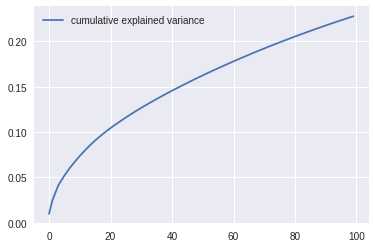

In [89]:
plt.plot(range(100), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

In [ ]:
tfidf_er.get_feature_names()

In [90]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=nonempty_pages_df.pageid,
                                        columns=component_names)
latent_semantic_analysis['article'] = nonempty_pages_df.article
latent_semantic_analysis['title'] = nonempty_pages_df.title

In [91]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_er.get_feature_names()).T

In [92]:
for i in range(1,11):
    vocabulary_expression['abs_component_{}'.format(i)] = np.abs(vocabulary_expression['component_{}'.format(i)])

In [93]:
vocabulary_expression['abs_component_1'].sort_values(ascending=False).head(7)

displaystyle    0.598012
data            0.150104
learning        0.149219
mathbf          0.117098
algorithm       0.110826
model           0.093511
function        0.088508
Name: abs_component_1, dtype: float64

In [ ]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(corpus_df.sentence)

In [50]:
document_term_matrix_df = pd.DataFrame(dtf_sparse.toarray(),
                                       index=nonempty_pages_df.pageid,
                                       columns=tfidf_er.get_feature_names())

MemoryError: 

In [ ]:
pd.concat([corpus_df.sentence, document_term_matrix_df], axis=1).sample(4)

In [ ]:
## Look at adding stemmer, or lemanizer

## Beautiful soup

## Change to request and process raw html ( just do it!!)


## Need to reduce dimensionality 